In [1]:
import numpy as np
import paper_data

from qubit_system.geometry.regular_lattice_1d import RegularLattice1D
from qubit_system.geometry.regular_lattice_2d import RegularLattice2D
from qubit_system.qubit_system_classes import StaticQubitSystem, EvolvingQubitSystem
from qubit_system.utils.ghz_states import StandardGHZState, AlternatingGHZState
from qubit_system.utils.interpolation import get_hamiltonian_coeff_linear_interpolation

2-qubit system.

Solid lines show energy levels when $\Omega = 0$,
dotted lines show energy eigenvalues when $\Omega = 1$.


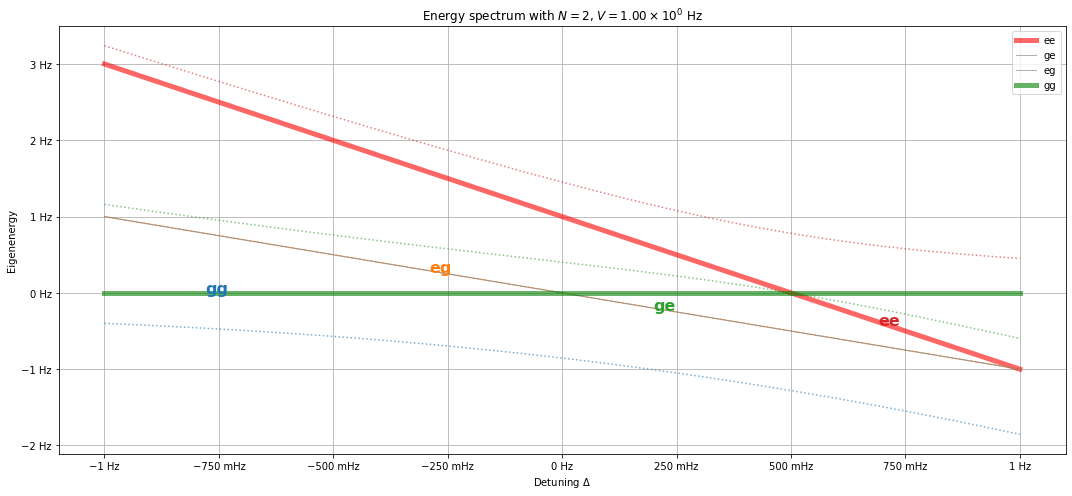

In [2]:
s_qs = StaticQubitSystem(
    N=2, V=1,
    geometry=RegularLattice1D(),
    Omega=1, Delta=np.linspace(-1, 1, 50)
)
s_qs.plot()


4-qubit systems.

First plot shows 1D lattice,
second plot shows 2D lattice of shape (2, 2).


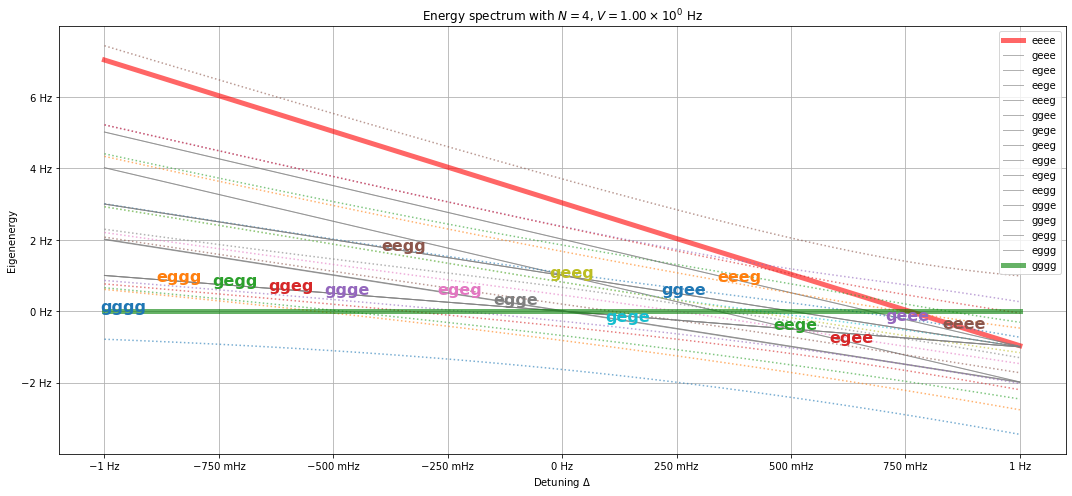

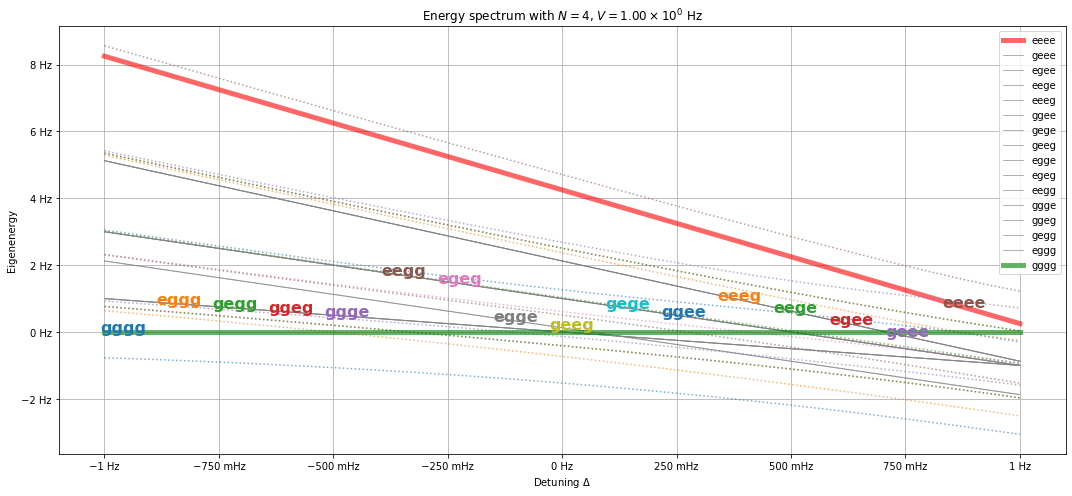

In [3]:
s_qs_1d = StaticQubitSystem(
    N=4, V=1,
    geometry=RegularLattice1D(),
    Omega=1, Delta=np.linspace(-1, 1, 50)
)
s_qs_1d.plot()

s_qs_2d = StaticQubitSystem(
    N=4, V=1,
    geometry=RegularLattice2D((2, 2)),
    Omega=1, Delta=np.linspace(-1, 1, 50)
)
s_qs_2d.plot()


Evolving 2-qubit system.

State evolution with simple functions for $\Omega$ and $\Delta$.


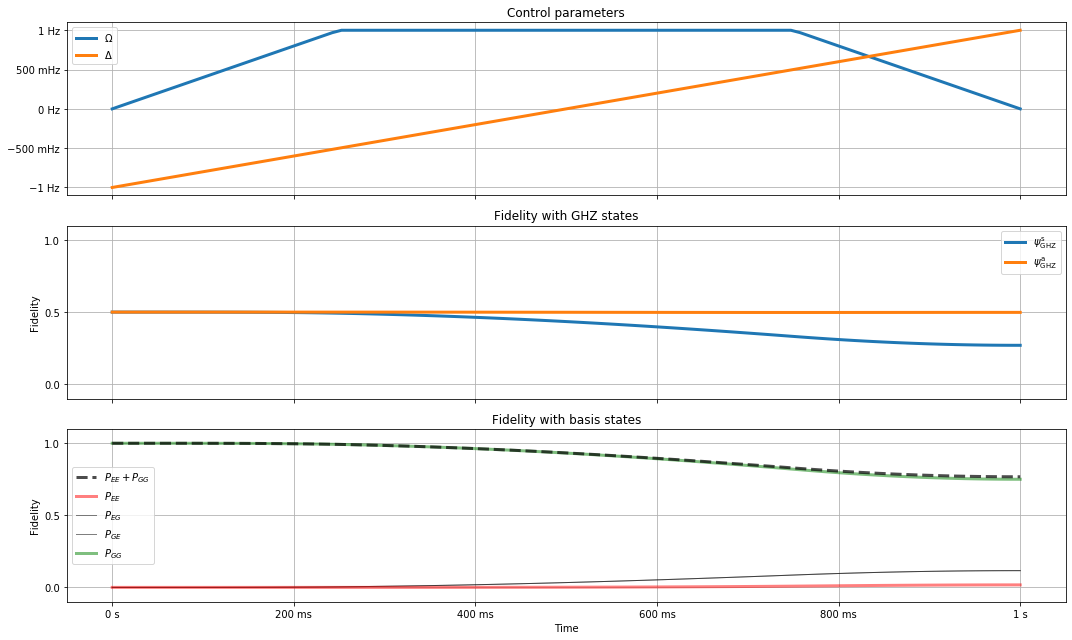

In [4]:
t = 1
N = 2
e_qs = EvolvingQubitSystem(
    N=N, V=1, geometry=RegularLattice1D(),
    Omega=get_hamiltonian_coeff_linear_interpolation([0, t / 4, t * 3 / 4, t], [0, 1, 1, 0]),
    Delta=get_hamiltonian_coeff_linear_interpolation([0, t], [-1, 1]),
    t_list=np.linspace(0, t, 100),
    ghz_state=StandardGHZState(N)
)
e_qs.solve()
e_qs.plot()

Evolving 4-qubit system.

State evolution with values for $\Omega$ and $\Delta$ transcribed from paper.

Paper contains additional detuning fields specifically on edge-qubits, which are not applied here.
Hence, non-optimal performance is expected.
However, system does show significantly good performance w.r.t. fidelity gained.
Also, most-prevalent non-GHZ-state is "egge", which is specifically reduced by the not-implemented edge-fields.


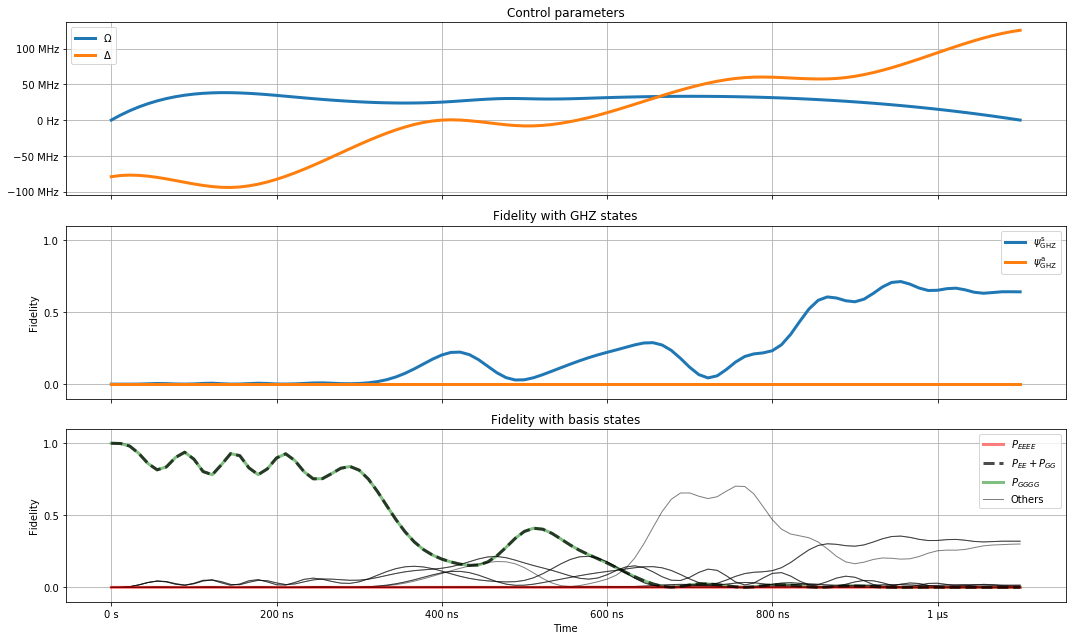

In [5]:
t = 1.1e-6
N = 4
e_qs = EvolvingQubitSystem(
    N=N, V=paper_data.V, geometry=RegularLattice1D(),
    Omega=paper_data.get_hamiltonian_coeff_fn(paper_data.Omega, N),
    Delta=paper_data.get_hamiltonian_coeff_fn(paper_data.Delta, N),
    t_list=np.linspace(0, t, 100),
    ghz_state=AlternatingGHZState(N)
)
e_qs.solve()
e_qs.plot()

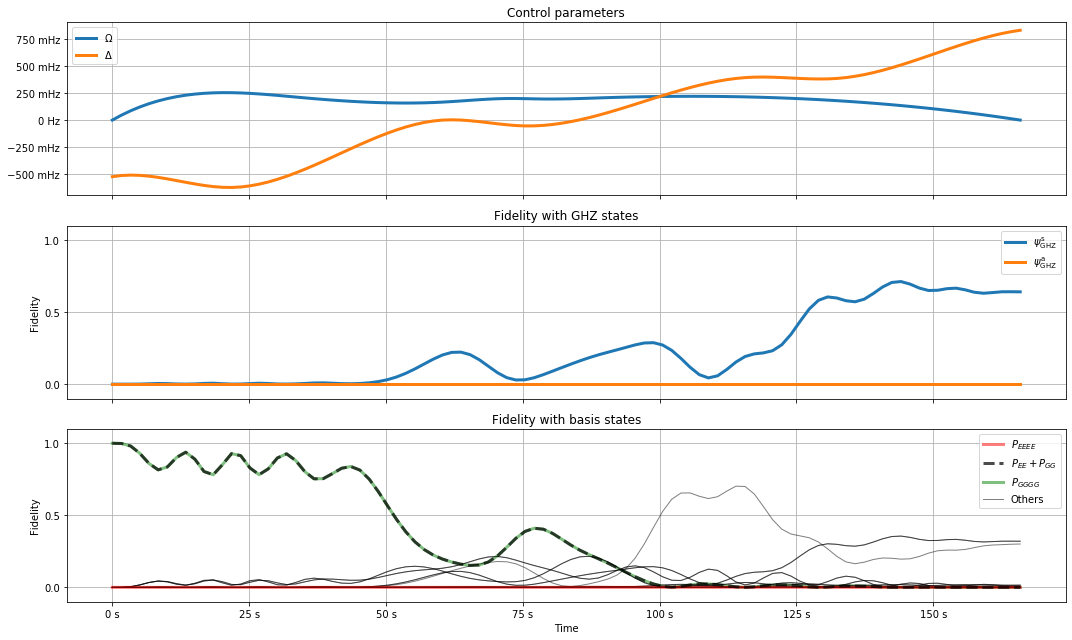

In [9]:
from paper_data.interpolation import get_interpolated_function

def get_hamiltonian_coeff_fn(_data_dict: dict, _N: int):
    __data_dict = {_t * paper_data.V: _v / paper_data.V for _t, _v in _data_dict[N].items()}
    interpolated_fn = get_interpolated_function(__data_dict)
    
    def coeff_fn(t: float, args: dict = None):
        return interpolated_fn(t)
    
    return coeff_fn

t = 1.1e-6
N = 4
e_qs = EvolvingQubitSystem(
    N=N, V=1, geometry=RegularLattice1D(),
    Omega=get_hamiltonian_coeff_fn(paper_data.Omega, N),
    Delta=get_hamiltonian_coeff_fn(paper_data.Delta, N),
    t_list=np.linspace(0, t * paper_data.V, 100),
    ghz_state=AlternatingGHZState(N)
)
e_qs.solve()
e_qs.plot()

